**Team 4**

**Code by Alex, Derrick, Jackie, Arwen, Andrei, Silas**

**Mentor:** Ronald Kroening

**Data:** bop_data_retrieved_by_ian

**Research question:** Does turbidity, water temperature, and pH levels affect the size of oysters?

In [ ]:
# Load our libraries
%matplotlib notebook
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# ian's data
data = pd.read_csv('http://webpage.pace.edu/fparisi/STEM-2020/Python/bop_data_retrivedbyian.csv')
data

,pH_method,waterTemperature_results_1,rainedIn7Days,_id,pH_results_1,turbidity_results_2,dissolvedOxygen_units,weatherConditions,windSpeedMPH,dissolvedOxygen_results_2,waterTemperature_results_0,waterTemperature_results_2,turbidity_average,salinity_results_0,dissolvedOxygen,pH,waterColor,turbidity_results_1,waterTemperature,expedition_id,waterTemperature_units,pH_results_0,airTemperatureC,waterTemperature_method,salinity_average,salinity_method,windDirection,salinity_results_2,dissolvedOxygen_results_1,salinity,rainedIn24Hours,pH_average,turbidity_units,pH_units,turbidity_method,waterGarbage,dissolvedOxygen_average,rainedIn72Hours,dissolvedOxygen_results_0,humidityPer,sizeOfLiveOysterMM,dissolvedOxygen_method,pH_results_2,waterTemperature_average,landGarbage,salinity_units,turbidity_results_0,salinity_results_1,oilSheen,turbidity
0,sensorRO,80.0,False,578fc14069723c560e30fca9,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,22.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
1,sensorRO,80.0,False,57902d4169723c560e30fe0c,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,41.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
2,sensorRO,80.0,False,57902d4169723c560e30fe0b,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,25.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
3,sensorRO,80.0,False,578fc14069723c560e30fca7,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,21.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
4,sensorRO,80.0,False,57902d4169723c560e30fe0a,7.8,65.2,mgl,partly-cloudy,4.6,6.0,81.0,82.0,64.80,17.0,NaN,NaN,lightGreen,64.8,NaN,578fc12f69723c560e30fc90,f,7.9,32.0,digitalThermometer,16.333333,hydrometer,north,16.0,6.0,NaN,False,7.833333,cm,pHlogscale,turbidityTube,False,5.666667,False,5.0,42.0,23.0,colormetricvAmpules,7.8,81.00,False,ppt,64.4,16.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,testStrips,24.0,True,5805779c4885e2a854c8dcde,6.0,43.0,mgl,partly-cloudy,5.5,6.0,25.0,24.0,47.67,15.0,NaN,NaN,lightGreen,46.0,NaN,57c99f9e7bf4b87b0e61f71a,c,6.0,24.5,analogThermometer,15.000000,hydrometer,southeast,15.0,6.0,NaN,True,6.000000,cm,pHlogscale,turbidityTube,False,6.000000,True,6.0,43.0,47.0,colormetricvAmpules,6.0,24.33,False,ppt,54.0,15.0,False,NaN
1093,testStrips,24.0,True,580566f34885e2a854c8dc0f,6.0,43.0,mgl,partly-cloudy,5.5,6.0,25.0,24.0,47.67,15.0,NaN,NaN,lightGreen,46.0,NaN,57c99f9e7bf4b87b0e61f71a,c,6.0,24.5,analogThermometer,15.000000,hydrometer,southeast,15.0,6.0,NaN,True,6.000000,cm,pHlogscale,turbidityTube,False,6.000000,True,6.0,43.0,46.0,colormetricvAmpules,6.0,24.33,False,ppt,54.0,15.0,False,NaN
1094,testStrips,24.0,True,5805779c4885e2a854c8dcdd,6.0,43.0,mgl,partly-cloudy,5.5,6.0,25.0,24.0,47.67,15.0,NaN,NaN,lightGreen,46.0,NaN,57c99f9e7bf4b87b0e61f71a,c,6.0,24.5,analogThermometer,15.000000,hydrometer,southeast,15.0,6.0,NaN,True,6.000000,cm,pHlogscale,turbidityTube,False,6.000000,True,6.0,43.0,46.0,colormetricvAmpules,6.0,24.33,False,ppt,54.0,15.0,False,NaN
1095,testStrips,24.0,True,5

In [ ]:
# Cleaning data: Selecting columns that we need
my_data = data[["pH_average", "turbidity_average", "waterTemperature_average", "sizeOfLiveOysterMM"]]
my_data.shape

(1097, 4)

In [ ]:
# Removed All The Data With NaN
no_missing_data = my_data.dropna() 
no_missing_data

,pH_average,turbidity_average,waterTemperature_average,sizeOfLiveOysterMM
0,7.833333,64.80,81.00,22.0
1,7.833333,64.80,81.00,41.0
2,7.833333,64.80,81.00,25.0
3,7.833333,64.80,81.00,21.0
4,7.833333,64.80,81.00,23.0
...,...,...,...,...
1092,6.000000,47.67,24.33,47.0
1093,6.000000,47.67,24.33,46.0
1094,6.000000,47.67,24.33,46.0
1095,6.000000,47.67,24.33,39.0


In [ ]:
# Delete the rows
# df holds all the rows excluding pH averages over 14
df = no_missing_data.drop(no_missing_data[no_missing_data['pH_average'] > 14].index)
df 

,pH_average,turbidity_average,waterTemperature_average,sizeOfLiveOysterMM
0,7.833333,64.80,81.00,22.0
1,7.833333,64.80,81.00,41.0
2,7.833333,64.80,81.00,25.0
3,7.833333,64.80,81.00,21.0
4,7.833333,64.80,81.00,23.0
...,...,...,...,...
1092,6.000000,47.67,24.33,47.0
1093,6.000000,47.67,24.33,46.0
1094,6.000000,47.67,24.33,46.0
1095,6.000000,47.67,24.33,39.0


In [ ]:
#Change all temperature values from Celsius to Fahrenheit

for i in range(len(df)):
  # We assume that the temperature value is in Celsius if it is at most 31.
  if df.iloc[i]["waterTemperature_average"] <= 31:
    # Round all new values to 2 decimal places
    # Changing values directly in df to Fahrenheit instead of creating new DataFrame
    df.iloc[i]["waterTemperature_average"] = "{:.2f}".format(df.iloc[i]["waterTemperature_average"] * 9 / 5 + 32)

# TEST: Row 108 contains 29C, which is 84.2F
print(df.iloc[108]["waterTemperature_average"])

84.2


In [ ]:
# Rounding all pH averages to 1 decimal place

for i in range(len(df["pH_average"])):
  df.iloc[i]["pH_average"] = "{:.1f}".format(df.iloc[i]["pH_average"])
  print(df.iloc[i]["pH_average"])

7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
7.8
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.2
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0


In [ ]:
# Rounding all turbidity averages to 1 decimal place

for i in range(len(df["turbidity_average"])):
  df.iloc[i]["turbidity_average"] = "{:.1f}".format(df.iloc[i]["turbidity_average"])
  print(df.iloc[i]["turbidity_average"])

64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
64.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
21.3
21.3
21.3
21.3
21.3


In [ ]:
# The for loop will round all Oyster Sizes to 1 decimal place

for i in range(len(df["sizeOfLiveOysterMM"])): # loop through all the oysters
  df.iloc[i]["sizeOfLiveOysterMM"] = "{:.1f}".format(df.iloc[i]["sizeOfLiveOysterMM"]) # changed the decimal place to 00.0
  #print(final_df.iloc[i]["sizeOfLiveOysterMM"])

In [ ]:
# final_df will hold our final DataFrame, including all oyster sizes above 9mm

#final_df = df.drop(df[df['sizeOfLiveOysterMM'] <= 9].index) # tried to remove all the single digits..
# any oyster size below 10 will be considered "too small"

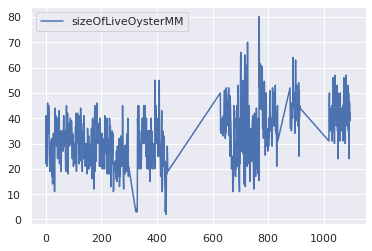

In [ ]:
# Make a line graph

# final_df['sizeOfLiveOysterMM'].plot()
df.plot(y = 'sizeOfLiveOysterMM')

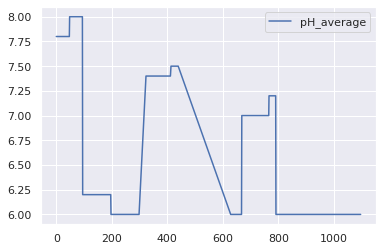

In [ ]:
# Make a line graph

# final_df['sizeOfLiveOysterMM'].plot()
df.plot(y = "pH_average")

In [ ]:
#Shows if there is a Correlation between pH_average and SizeOfLiveOysters
np.corrcoef(df["pH_average"], df["sizeOfLiveOysterMM"])

array([[ 1.        , -0.17269697],
       [-0.17269697,  1.        ]])

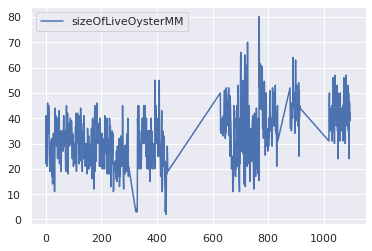

In [ ]:
# Make a scatter plot

df.plot(y = 'sizeOfLiveOysterMM')

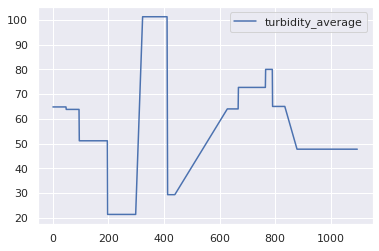

In [ ]:
# Make a scatter plot

df.plot(y = "turbidity_average")

In [ ]:
#Shows if there is a Correlation between Turbidy_average and SizeOfLiveOysters
np.corrcoef(df["turbidity_average"], df["sizeOfLiveOysterMM"])

array([[1.        , 0.11105303],
       [0.11105303, 1.        ]])

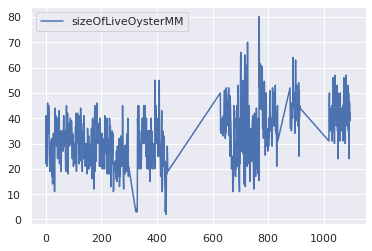

In [ ]:
df.plot(y = "sizeOfLiveOysterMM")

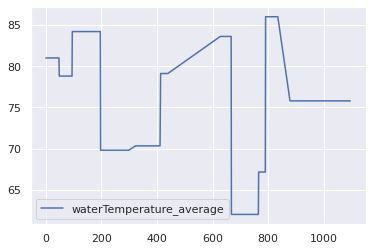

In [ ]:
df.plot(y = "waterTemperature_average")

In [ ]:
#Shows if there is a Correlation between WaterTemperature and SizeOfLiveOysters
np.corrcoef(df["waterTemperature_average"], df["sizeOfLiveOysterMM"])

////////////////////////////////////////////////////////////////////////////////

In [ ]:
# rows with pH > 14
no_missing_data[no_missing_data['pH_average'] > 14]

In [ ]:
# Nb of rows with pH > 14
no_missing_data[no_missing_data['pH_average'] > 14].shape

In [ ]:
# Checking
# Nb of NaNs in turbidity_average
rows, columns = no_missing_data.shape
print('Total number of rows', rows)
rows_with_missing_values = no_missing_data[['turbidity_average']].isnull().sum()
print('Rows with missing data', rows_with_missing_values[0])
rows_without_missing_values = rows - rows_with_missing_values[0]
print('Rows without missing data', rows_without_missing_values)

In [ ]:
df.shape

In [ ]:
# data first row
data[["pH_average", "turbidity_average", "waterTemperature_average", "sizeOfLiveOysterMM"]].iloc[0]
#arr = []
# arr.append(data[["pH_average"]])

In [ ]:
for i in range(len(final_df)):
  print(final_df.iloc[i]["sizeOfLiveOysterMM"])

In [ ]:
#xaxis = final_df.iloc["pH_average"]
#yaxis = final_df.iloc["sizeOfLiveOysterMM"]
#plt.plot(xaxis, yaxis)
#plt.title('title name')
#plt.xlabel('xAxis name')
#plt.ylabel('yAxis name')
#plt.show()

In [ ]:
# Make a line graph

# final_df['sizeOfLiveOysterMM'].plot()
final_df.plot(y = 'sizeOfLiveOysterMM', x = "pH_average")